## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('telco_customer_churn.csv')

## EDA and Feature Engineering

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

## Feature Importance

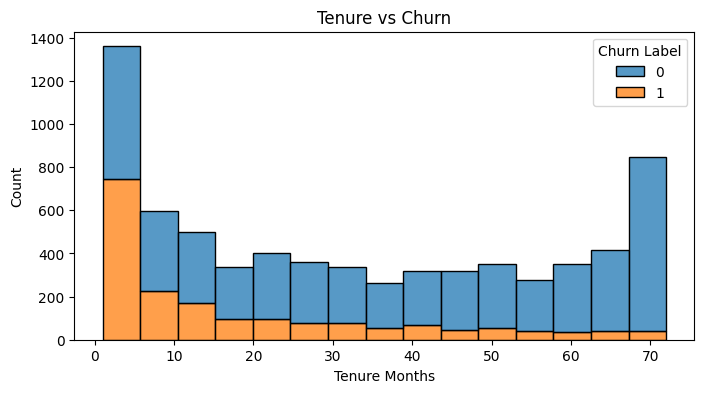

In [35]:
import seaborn as sns

plt.figure(figsize = (8,4))
sns.histplot(data = df, x = 'Tenure Months', hue = 'Churn Label', multiple = 'stack')
plt.title('Tenure vs Churn')
plt.show()

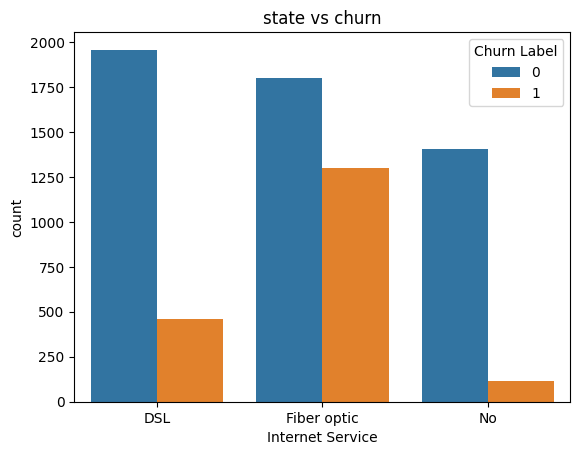

In [37]:
sns.countplot(x = 'Internet Service', hue = 'Churn Label', data = df)
plt.title('state vs churn')
plt.show()

Churn Label               0          1
Internet Service                      
DSL               81.001656  18.998344
Fiber optic       58.107235  41.892765
No                92.565789   7.434211


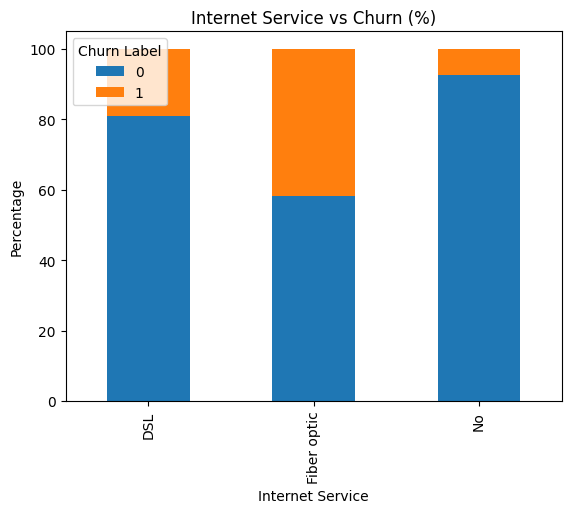

In [36]:
internet_churn = pd.crosstab(df['Internet Service'], df['Churn Label'], normalize='index') * 100
print(internet_churn)
internet_churn.plot(kind='bar', stacked=True)
plt.title("Internet Service vs Churn (%)")
plt.ylabel("Percentage")
plt.show()

In [6]:
df.drop(columns=['Gender','Count','Country','State','CustomerID','Zip Code','Gender','Lat Long','Latitude','Churn Reason','Churn Value'], inplace=True)

In [7]:
df.drop(columns=['City','Longitude'], inplace=True)

In [8]:
df.replace(' ',np.nan,inplace = True)

In [9]:
df.isnull().sum()

Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Score           0
CLTV                  0
dtype: int64

In [10]:
df = df.dropna(subset=['Total Charges'])

In [11]:
df.isnull().sum()

Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Score          0
CLTV                 0
dtype: int64

In [12]:
df['Total Charges'] = df['Total Charges'].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior Citizen     7032 non-null   object 
 1   Partner            7032 non-null   object 
 2   Dependents         7032 non-null   object 
 3   Tenure Months      7032 non-null   int64  
 4   Phone Service      7032 non-null   object 
 5   Multiple Lines     7032 non-null   object 
 6   Internet Service   7032 non-null   object 
 7   Online Security    7032 non-null   object 
 8   Online Backup      7032 non-null   object 
 9   Device Protection  7032 non-null   object 
 10  Tech Support       7032 non-null   object 
 11  Streaming TV       7032 non-null   object 
 12  Streaming Movies   7032 non-null   object 
 13  Contract           7032 non-null   object 
 14  Paperless Billing  7032 non-null   object 
 15  Payment Method     7032 non-null   object 
 16  Monthly Charges    7032 non-n

In [14]:
unique_values = df.apply(lambda x: x.unique())
print(unique_values)

Senior Citizen                                               [No, Yes]
Partner                                                      [No, Yes]
Dependents                                                   [No, Yes]
Tenure Months        [2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 1...
Phone Service                                                [Yes, No]
Multiple Lines                             [No, Yes, No phone service]
Internet Service                                [DSL, Fiber optic, No]
Online Security                         [Yes, No, No internet service]
Online Backup                           [Yes, No, No internet service]
Device Protection                       [No, Yes, No internet service]
Tech Support                            [No, Yes, No internet service]
Streaming TV                            [No, Yes, No internet service]
Streaming Movies                        [No, Yes, No internet service]
Contract                          [Month-to-month, Two year, One year]
Paperl

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.loc[:, 'Churn Label'] = le.fit_transform(df['Churn Label'])
df.loc[:, 'Senior Citizen'] = le.fit_transform(df['Senior Citizen'])
df.loc[:, 'Partner'] = le.fit_transform(df['Partner'])
df.loc[:, 'Phone Service'] = le.fit_transform(df['Phone Service'])
df.loc[:, 'Paperless Billing'] = le.fit_transform(df['Paperless Billing'])
df.loc[:, 'Dependents'] = le.fit_transform(df['Dependents'])

In [16]:
df['Churn Label']  = df['Churn Label'].astype(int)

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [18]:
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']

In [20]:
encoded = ColumnTransformer(transformers = [('encoder',OneHotEncoder(drop = 'first'),['Multiple Lines','Internet Service','Online Security',
                                                                                      'Online Backup','Device Protection','Tech Support','Streaming TV',
                                                                                     'Streaming Movies','Contract','Payment Method'])], remainder = 'passthrough'
                           )

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [22]:
X_train  = encoded.fit_transform(X_train)
X_test  = encoded.transform(X_test)
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

In [23]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression

model  = LogisticRegression(solver='saga')

In [27]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty' : ['l2','l1'],'C':[1,2,5,10,50,60,80,100],'max_iter':[500,1000,1500]} 
Classifier = GridSearchCV(estimator = model, param_grid =  parameter, scoring = 'accuracy',cv = 5)

In [28]:
Classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'),
             param_grid={'C': [1, 2, 5, 10, 50, 60, 80, 100],
                         'max_iter': [500, 1000, 1500],
                         'penalty': ['l2', 'l1']},
             scoring='accuracy')

In [29]:
Classifier.best_params_

{'C': 1, 'max_iter': 500, 'penalty': 'l2'}

In [30]:
y_pred = Classifier.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
score = accuracy_score(y_pred,y_test)
score

0.9175550817341862

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Parameters dictionary (well done)
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 12, 13, 14],
    'min_samples_split': [2, 3, 4, 5, 10, 12, 15, 16, 20],  # 🔥 avoid 1 here
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # 🔥 remove 'auto' for DecisionTree
}

# GridSearchCV
TreeClassifier = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=parameters, scoring='accuracy', cv=5)

# ✅ Here’s the fix: no extra parentheses around (X_train, y_train)
TreeClassifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 12, 13, 14],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 4, 5, 10, 12, 15, 16, 20]},
             scoring='accuracy')

In [40]:
TreeClassifier.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 16}

In [41]:
y_pred = TreeClassifier.predict(X_test)

In [42]:
score2 = accuracy_score(y_pred,y_test)
score2

0.9253731343283582